# Udacity Data Science Project: Spotify Recommendation System

#### For this project, I'm going to use a dataset that uses spotify's API 'spotipy' that has gathered data on artists over a variety of years. The dataset includes data about the artist genres and popularity as well as song run time and audio features etc.

#### My aim is to produce an artist recommendation from an inputted artist, by finding which artists have the most similar genres. I would then try another method to rank these similar artists to return the best recommendations. This would be done via a artist-genres matrix.

#### I also aim to produce a song recommendation from an inputted song, by finding songs that are most similar using spotipys audio meta data. This data will need to be normalised. Then, I aim to improve it by including the song genres, which will use td-idf to hopefully produce more optimal recommendations.

#### The dataset was gathered from: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

## Gathering Data

In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


df = pd.read_excel('spotify_genre_final.xlsx')

In [245]:
conda install -c conda-forge spotipy


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [246]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="0e58969e0fc64ff7ae10502c99ccc90a",
                                                           client_secret="6ba5290e0a104d53a21d3ffbede39c57"))

## Data Cleaning

In [247]:
df.head(20)

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.313000,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.000880,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.002900,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.171000,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.580000,0.003200,0.1160,0.197,82.433,4
5,rock,American Girl,https://i.scdn.co/image/ab67616d0000b2737e42a5...,Tom Petty and the Heartbreakers,214733,False,7MRyJPksH3G2cXHN8UKYzP,73,1976-11-09,day,...,2,-5.988,1,0.0334,0.448000,0.000127,0.3660,0.777,114.512,4
6,rock,The Joker,https://i.scdn.co/image/ab67616d0000b273375445...,Steve Miller Band,264503,False,1bp2IO61zbQrbWNmKKxg3f,75,1973-01-01,day,...,5,-9.616,1,0.0396,0.365000,0.000005,0.2060,0.796,83.293,4
7,rock,Drive - 2017 Remaster,https://i.scdn.co/image/ab67616d0000b273f60758...,The Cars,234332,False,2lFFiNm0XtgJ6wkdncTB4k,67,1984,year,...,6,-7.871,1,0.0414,0.115000,0.000780,0.1020,0.405,83.495,4
8,rock,Hard To Handle,https://i.scdn.co/image/ab67616d0000b273a4d2cb...,The Black Crowes,188066,False,05NYcsjJwOYq4jIiKPVj9p,71,1990-02-13,day,...,4,-3.580,1,0.0430,0.002570,0.001810,0.3120,0.961,103.783,4
9,rock,Sunshine Of Your Love,https://i.scdn.co/image/ab67616d0000b273f7d3ba...,Cream,250000,False,6FRwDxXsvSasw0y2eDArsz,68,1967-11-02,day,...,2,-12.590,1,0.0384,0.475000,0.000066,0.1180,0.784,115.078,4


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   6917 non-null   object 
 1   Title                   6917 non-null   object 
 2   Album_cover_link        6917 non-null   object 
 3   Artist                  6917 non-null   object 
 4   duration_ms             6917 non-null   int64  
 5   explicit                6917 non-null   bool   
 6   id                      6917 non-null   object 
 7   popularity              6917 non-null   int64  
 8   release_date            6917 non-null   object 
 9   release_date_precision  6917 non-null   object 
 10  total_tracks            6917 non-null   int64  
 11  danceability            6917 non-null   float64
 12  energy                  6917 non-null   float64
 13  key                     6917 non-null   int64  
 14  loudness                6917 non-null   

In [249]:
df['Title'] = df['Title'].str.lower()
df['Artist'] = df['Artist'].str.lower()
#Converting all artists and song names into lower case

In [250]:
df['Title'].duplicated().value_counts()

df = df.drop_duplicates(subset=['Title'])

df['Title'].duplicated().value_counts() #checking for any duplicate songs

False    5787
Name: Title, dtype: int64

In [311]:
df.head(50)

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_genres
0,rock,baba o'riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,the who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971,day,...,-8.367,1,0.0352,0.313000,0.185000,0.2870,0.150,117.292,4,"[album rock, art rock, blues rock, british inv..."
1,rock,more than a feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,-8.039,1,0.0298,0.000880,0.002300,0.0504,0.285,108.789,4,"[album rock, art rock, classic rock, country r..."
2,rock,(don't fear) the reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,blue öyster cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,-8.550,0,0.0733,0.002900,0.000208,0.2970,0.385,141.466,4,"[album rock, art rock, blues rock, classic roc..."
3,rock,jump - 2015 remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,van halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984,day,...,-6.219,1,0.0317,0.171000,0.000377,0.0702,0.795,129.981,4,"[album rock, classic rock, hard rock, metal, r..."
4,rock,stairway to heaven - remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,led zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971,day,...,-12.049,0,0.0339,0.580000,0.003200,0.1160,0.197,82.433,4,"[album rock, classic rock, hard rock, rock]"
5,rock,american girl,https://i.scdn.co/image/ab67616d0000b2737e42a5...,tom petty and the heartbreakers,214733,False,7MRyJPksH3G2cXHN8UKYzP,73,1976,day,...,-5.988,1,0.0334,0.448000,0.000127,0.3660,0.777,114.512,4,"[album rock, classic rock, folk rock, heartlan..."
6,rock,the joker,https://i.scdn.co/image/ab67616d0000b273375445...,steve miller band,264503,False,1bp2IO61zbQrbWNmKKxg3f,75,1973,day,...,-9.616,1,0.0396,0.365000,0.000005,0.2060,0.796,83.293,4,"[album rock, blues rock, classic rock, country..."
7,rock,drive - 2017 remaster,https://i.scdn.co/image/ab67616d0000b273f60758...,the cars,234332,False,2lFFiNm0XtgJ6wkdncTB4k,67,1984,year,...,-7.871,1,0.0414,0.115000,0.000780,0.1020,0.405,83.495,4,"[album rock, art rock, classic rock, hard rock..."
8,rock,hard to handle,https://i.scdn.co/image/ab67616d0000b273a4d2cb...,the black crowes,188066,False,05NYcsjJwOYq4jIiKPVj9p,71,1990,day,...,-3.580,1,0.0430,0.002570,0.001810,0.3120,0.961,103.783,4,"[album rock, blues rock, classic rock, country..."
9,rock,sunshine of your love,https://i.scdn.co/image/ab67616d0000b273f7d3ba...,cream,250000,False,6FRwDxXsvSasw0y2eDArsz,68,1967,day,...,-12.590,1,0.0384,0.475000,0.000066,0.1180,0.784,115.078,4,"[album rock, art rock, blues rock, classic roc..."


In [252]:
df['release_date'] = df['release_date'].str[0:4]

In [253]:
df_rec = df.drop(columns = ['mode','duration_ms','Album_cover_link','explicit','id','release_date','release_date_precision','total_tracks','time_signature'])
                     #Dropping columns not nexessary for my analysis
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 0 to 6916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genre             5787 non-null   object 
 1   Title             5787 non-null   object 
 2   Artist            5787 non-null   object 
 3   popularity        5787 non-null   int64  
 4   danceability      5787 non-null   float64
 5   energy            5787 non-null   float64
 6   key               5787 non-null   int64  
 7   loudness          5787 non-null   float64
 8   speechiness       5787 non-null   float64
 9   acousticness      5787 non-null   float64
 10  instrumentalness  5787 non-null   float64
 11  liveness          5787 non-null   float64
 12  valence           5787 non-null   float64
 13  tempo             5787 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 678.2+ KB


## Data Exploration

In [254]:
df_rec.iloc[:,3:].corr()


,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.062480,-0.104425,-0.017334,0.016977,-0.115117,0.087784,-0.083409,-0.040477,-0.036261,0.024650
danceability,-0.062480,1.000000,-0.063621,0.031657,0.028832,0.256631,-0.053907,-0.094443,-0.065770,0.373871,-0.221887
energy,-0.104425,-0.063621,1.000000,0.018730,0.619961,0.042662,-0.505584,0.137553,0.138638,0.232087,0.118662
key,-0.017334,0.031657,0.018730,1.000000,0.003141,0.048004,-0.011939,0.001454,0.029120,0.031427,-0.024607
loudness,0.016977,0.028832,0.619961,0.003141,1.000000,0.011955,-0.273618,0.005359,0.051077,0.028944,0.086704
speechiness,-0.115117,0.256631,0.042662,0.048004,0.011955,1.000000,-0.081754,-0.088277,0.088689,0.091396,-0.024466
acousticness,0.087784,-0.053907,-0.505584,-0.011939,-0.273618,-0.081754,1.000000,-0.125350,-0.065220,-0.036341,-0.069556
instrumentalness,-0.083409,-0.094443,0.137553,0.001454,0.005359,-0.088277,-0.125350,1.000000,0.024536,-0.157364,0.046353
liveness,-0.040477,-0.065770,0.138638,0.029120,0.051077,0.088689,-0.065220,0.024536,1.000000,0.013840,-0.010628
valence,-0.036261,0.373871,0.232087,0.031427,0.028944,0.091396,-0.036341,-0.157364,0.013840,1.000000,-0.040028


We can see that acousticness has the strongest positive correlation to popularity and speechiness has the strongest negative correlation to popularity. However, all seem to have no real correlation to popularity

AxesSubplot(0.125,0.125;0.775x0.755)


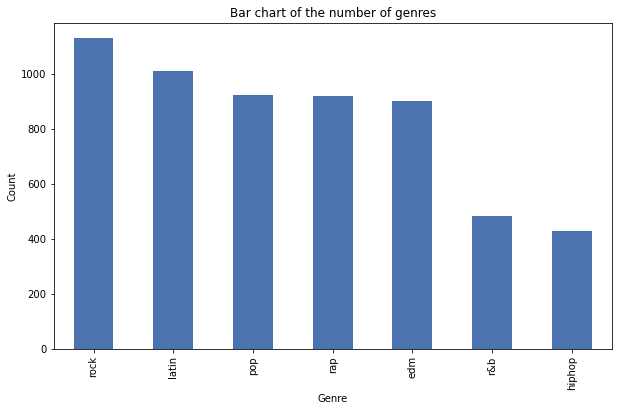

In [255]:
sb.set_palette("deep")
plt.figure(figsize=(10,6))
genres_bar_plot = df_rec.Genre.value_counts().plot(kind='bar')
plt.title('Bar chart of the number of genres')
plt.xlabel('Genre')
plt.ylabel('Count')

print(genres_bar_plot);

Rock is the most common genre in our dataset whereas hiphop has the least.

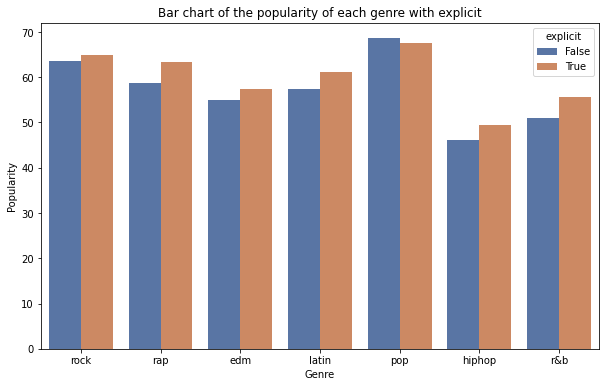

In [256]:

plt.figure(figsize=(10,6))
sb.barplot(data=df, x = 'Genre', y = 'popularity', hue = 'explicit', ci = None)
plt.title('Bar chart of the popularity of each genre with explicit')
plt.xlabel('Genre')
plt.ylabel('Popularity');

We can see the pop is the most popular and hiphop is the lease popular. Explixit songs are generally more popular than non-explicit songs.

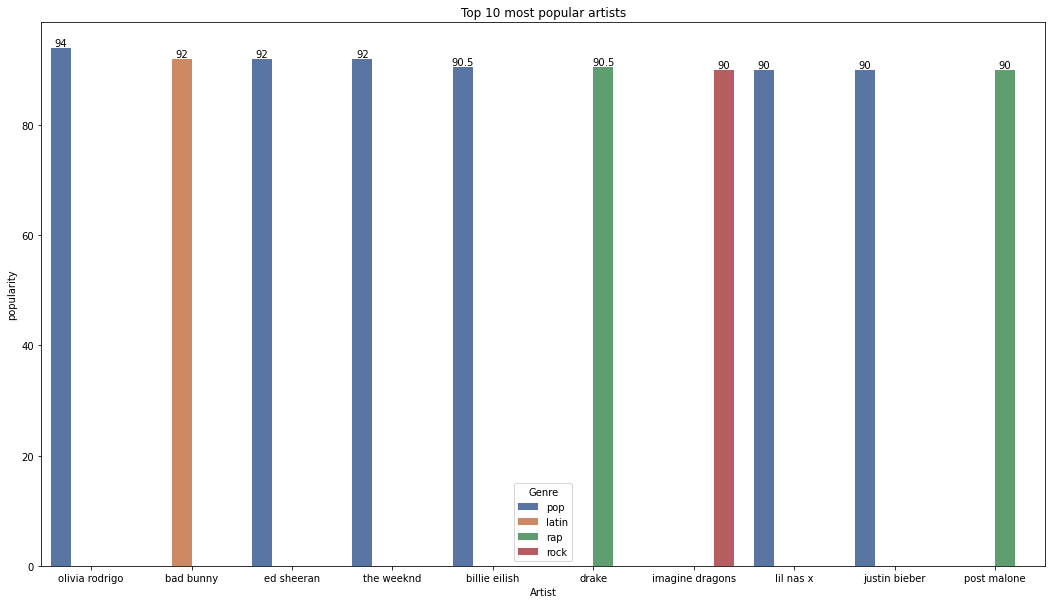

In [257]:
plt.figure(figsize=(18,10))
top_10_pop = df.groupby(['Artist','Genre'])['popularity'].mean().sort_values(ascending=False)[0:10].reset_index()
ax = sb.barplot(data=top_10_pop, x = 'Artist', y = 'popularity', hue = 'Genre')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 10 most popular artists');


We can see the pop artists dominate the top 10, with Olivia Rodrigo with the highest popularity score.

''

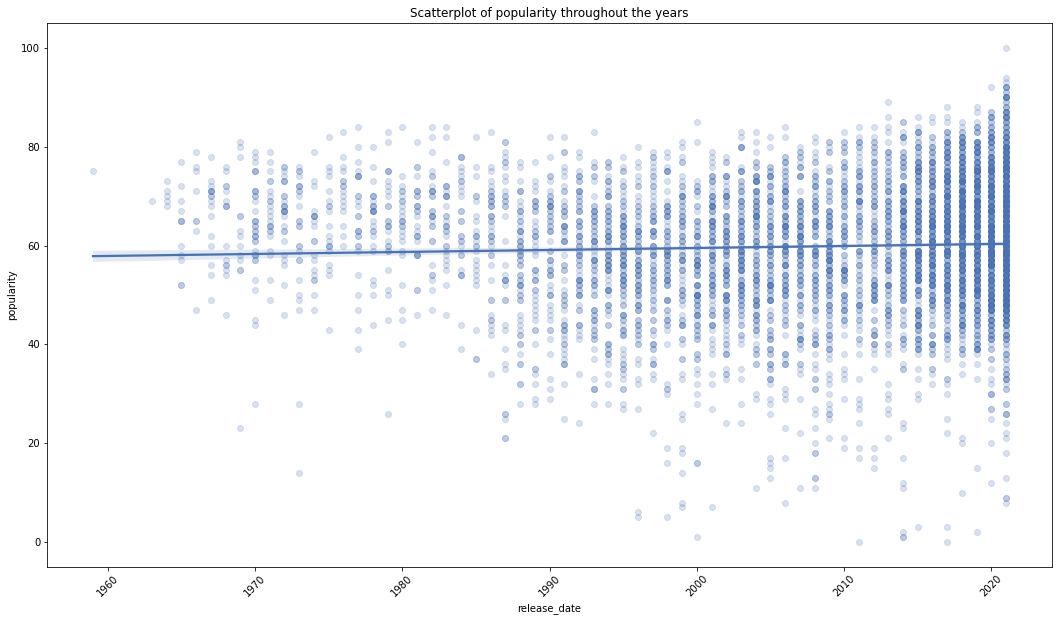

In [258]:
release_order = df.sort_values(by = 'release_date', ascending = True)

release_order['release_date'] = release_order['release_date'].astype('int')

plt.figure(figsize=(18,10))
sb.regplot(x='release_date', y = 'popularity', data=release_order, scatter_kws={"alpha" : 0.2})
plt.xticks(rotation=45)
plt.title('Scatterplot of popularity throughout the years')
;
#Creating a scatter plot of popularity through out the years 

We can see that there is not real correlation between release date and poopularity rating, but there is much more recent songs.

''

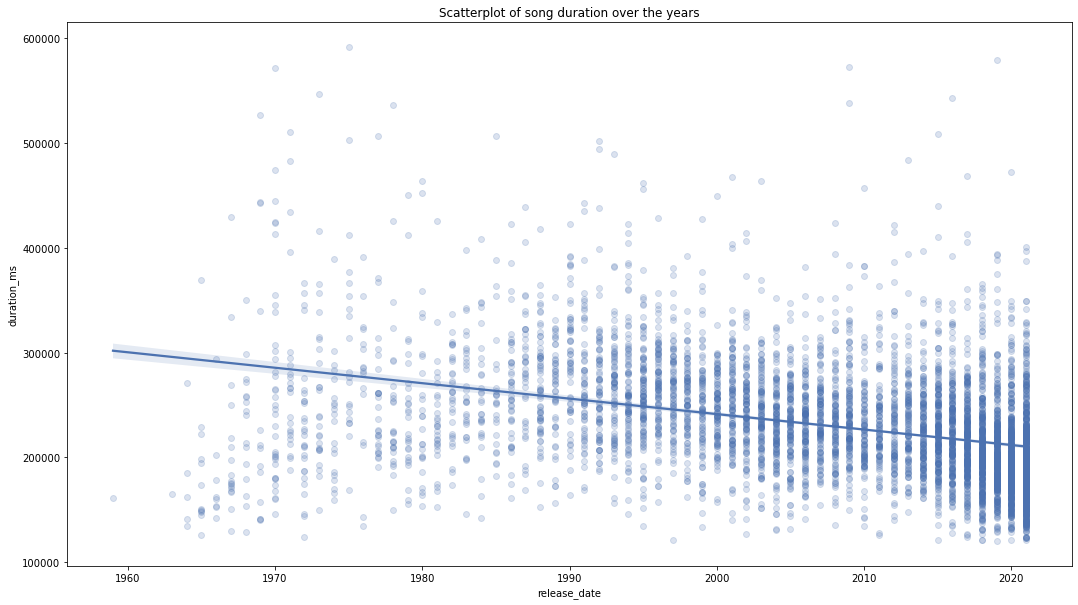

In [259]:
plt.figure(figsize=(18,10))
sb.regplot(x='release_date', y = 'duration_ms', data=release_order, scatter_kws={"alpha" : 0.2})
plt.title('Scatterplot of song duration over the years')
;

We can see that more recent songs seem to be shorter than older songs

## Data Transformation

In [260]:
result = sp.search("Nirvana", limit=1, type="artist")
artists = result["artists"]
# Display genres associated with the first search result
print(artists["items"][0]["genres"])

['grunge', 'permanent wave', 'rock']


Testing to see the output of spotipy's genres for Nirvana


In [261]:
artist_genre = []

for artist in df['Artist']:
    
    result = sp.search(artist, limit=1, type="artist")
    artists = result['artists']
    # Display genres associated with the first search result
    print(artists["items"][0]["genres"])
    artist_genre.append(artists["items"][0]["genres"])
    
df['artist_genres'] = artist_genre

['album rock', 'art rock', 'blues rock', 'british invasion', 'classic rock', 'hard rock', 'mellow gold', 'psychedelic rock', 'rock']
['album rock', 'art rock', 'classic rock', 'country rock', 'hard rock', 'mellow gold', 'rock', 'soft rock']
['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'metal', 'rock', 'soft rock']
['album rock', 'classic rock', 'hard rock', 'metal', 'rock']
['album rock', 'classic rock', 'hard rock', 'rock']
['album rock', 'classic rock', 'folk rock', 'heartland rock', 'mellow gold', 'pop rock', 'rock', 'soft rock']
['album rock', 'blues rock', 'classic rock', 'country rock', 'folk rock', 'hard rock', 'heartland rock', 'mellow gold', 'rock', 'soft rock']
['album rock', 'art rock', 'classic rock', 'hard rock', 'mellow gold', 'new romantic', 'new wave', 'new wave pop', 'permanent wave', 'pop rock', 'power pop', 'rock', 'soft rock']
['album rock', 'blues rock', 'classic rock', 'country rock', 'hard rock', 'jam band', 'pop rock', 'rock', 'southern 

creatinfg a column that contains the fill list of genres for the aritsts in the df.

In [262]:
df['artist_genres']

0       [album rock, art rock, blues rock, british inv...
1       [album rock, art rock, classic rock, country r...
2       [album rock, art rock, blues rock, classic roc...
3       [album rock, classic rock, hard rock, metal, r...
4             [album rock, classic rock, hard rock, rock]
                              ...                        
6908    [afrofuturism, alternative r&b, dance pop, esc...
6909          [hip pop, pop r&b, r&b, urban contemporary]
6910    [atl hip hop, dance pop, girl group, hip pop, ...
6913    [contemporary r&b, hip pop, neo soul, r&b, urb...
6916                                       [pop, pop r&b]
Name: artist_genres, Length: 5787, dtype: object

In [263]:
df_genres = df[['Artist','artist_genres']]

In [264]:
df_genres.Artist.value_counts()

madeintyo       4
geto boys       4
the who         3
vinai           3
jauz            3
               ..
james hype      1
marlo           1
kito            1
sonny fodera    1
jhenã© aiko     1
Name: Artist, Length: 2869, dtype: int64

In [265]:
df_genres = df_genres.drop_duplicates(subset=['Artist'])
df_genres.Artist.value_counts() # Removing the duplicate artists from our genres df

the who               1
natalia lafourcade    1
juan bautista         1
los toros             1
cauty                 1
                     ..
112                   1
only the family       1
trina                 1
sage the gemini       1
jhenã© aiko           1
Name: Artist, Length: 2869, dtype: int64

In [266]:

df_genres.isnull().sum()

df_genres_new = df_genres.copy()

In [267]:
df_genres = df_genres.explode('artist_genres')
df_genres #Separating the artist genres from an array.

,Artist,artist_genres
0,the who,album rock
0,the who,art rock
0,the who,blues rock
0,the who,british invasion
0,the who,classic rock
...,...,...
6777,goapele,r&b
6777,goapele,urban contemporary
6904,jhenã© aiko,pop
6904,jhenã© aiko,r&b


In [268]:
df_genres = pd.get_dummies(df_genres, columns=['artist_genres'])
df_genres #Creating a an artist-genre matrix

,Artist,artist_genres_abstract beats,artist_genres_abstract hip hop,artist_genres_acid rock,artist_genres_acoustic pop,artist_genres_acoustic punk,artist_genres_acoustic rock,artist_genres_adult standards,artist_genres_afro r&b,artist_genres_afrofuturism,...,artist_genres_washington indie,artist_genres_welsh rock,artist_genres_west coast rap,artist_genres_west coast trap,artist_genres_westcoast flow,artist_genres_windsor on indie,artist_genres_wonky,artist_genres_wu fam,artist_genres_yacht rock,artist_genres_zolo
0,the who,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,the who,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,the who,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,the who,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,the who,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,goapele,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6777,goapele,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,jhenã© aiko,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,jhenã© aiko,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
df_genres = df_genres.groupby('Artist').max().reset_index()
#combining the max values for each artist to have one row per artist


In [270]:
df_genres

,Artist,artist_genres_abstract beats,artist_genres_abstract hip hop,artist_genres_acid rock,artist_genres_acoustic pop,artist_genres_acoustic punk,artist_genres_acoustic rock,artist_genres_adult standards,artist_genres_afro r&b,artist_genres_afrofuturism,...,artist_genres_washington indie,artist_genres_welsh rock,artist_genres_west coast rap,artist_genres_west coast trap,artist_genres_westcoast flow,artist_genres_windsor on indie,artist_genres_wonky,artist_genres_wu fam,artist_genres_yacht rock,artist_genres_zolo
0,*nsync,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10cc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12th planet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 chainz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,zz top,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2865,ängie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2866,ñejo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2867,ñejo & dalmata,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
df_genres.set_index('Artist', inplace=True)
df_genres.head()


,artist_genres_abstract beats,artist_genres_abstract hip hop,artist_genres_acid rock,artist_genres_acoustic pop,artist_genres_acoustic punk,artist_genres_acoustic rock,artist_genres_adult standards,artist_genres_afro r&b,artist_genres_afrofuturism,artist_genres_afrofuturismo brasileiro,...,artist_genres_washington indie,artist_genres_welsh rock,artist_genres_west coast rap,artist_genres_west coast trap,artist_genres_westcoast flow,artist_genres_windsor on indie,artist_genres_wonky,artist_genres_wu fam,artist_genres_yacht rock,artist_genres_zolo
Artist,,,,,,,,,,,,,,,,,,,,,
*nsync,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10cc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12th planet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2 chainz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
artist_by_genres = df_genres.copy()

In [273]:
def get_artist_genres(artist):
    '''Input: 
    artist - artist name in lowercase
    
    Output:
    genres - list of artist genres genres 
    '''
    genres = artist_by_genres.loc[artist][artist_by_genres.loc[artist] == 1].index.values 
    return genres #return a list of genres that contain a 1 for artist

In [274]:
get_artist_genres('10cc') #test

array(['artist_genres_album rock', 'artist_genres_art rock',
       'artist_genres_blues rock', 'artist_genres_classic rock',
       'artist_genres_classic uk pop', 'artist_genres_folk rock',
       'artist_genres_glam rock', 'artist_genres_mellow gold',
       'artist_genres_rock', 'artist_genres_soft rock',
       'artist_genres_symphonic rock', 'artist_genres_yacht rock'],
      dtype=object)

In [275]:

def get_artist_pop(artist):
    '''Input: 
    artist - artist name in lowercase
    
    Output:
    artist_pop_df[artist] - mean artist popularity rating 
    '''
    artist_pop_df = df.groupby(by = 'Artist')['popularity'].mean() #Getting the mean popularity score for artist
    
    return artist_pop_df[artist]

In [276]:
get_artist_pop('foo fighters') #Test

76.66666666666667

In [277]:
most_pop_artists = df.groupby(by = 'Artist')['popularity'].mean().sort_values(ascending=False) ##Ordering by most popular artist
most_pop_artists_df = pd.DataFrame(data = most_pop_artists)
most_pop_artists_df

,popularity
Artist,
olivia rodrigo,94.0
bad bunny,92.0
the weeknd,92.0
ed sheeran,92.0
drake,90.5
...,...
jerry cantrell,5.0
toros band,3.0
d.o.c.,2.0


## Artist recommendation

### Computing the dot product of the one-hot encoded artist-genre matix with the artist genres. 
The artists with the highest score have the most similar genres

In [278]:
def most_similar_artist(artist):
    '''Input: 
    artist - artist name in lowercase
    
    Output:
    most_similar_score_df - df of the artists similarity score in descending order
    '''
    similar_artists_mat= artist_by_genres.dot(artist_by_genres.loc[artist].T)
    most_similar_score = similar_artists_mat.sort_values(ascending = False)
    most_similar_score_df = pd.DataFrame(data=most_similar_score).reset_index()
    most_similar_score_df.columns = ['Artist','sim_score']
    most_similar_score_df = most_similar_score_df[most_similar_score_df['Artist'] != artist]
    #computing the dot product of the artist-genre matix with the artist genres, and the artists with the highest score have the most similar genres
 
    
    
 
    
    return most_similar_score_df
    
    

In [279]:

most_similar_artist('2pac') #Test

,Artist,sim_score
0,spice 1,5
1,warren g,5
2,compton's most wanted,5
3,dj quik,5
4,xzibit,5
...,...,...
2864,"héctor ""el father""",0
2865,"héctor acosta ""el torito""",0
2866,i dont know how but they found me,0
2867,i_o,0


### Improved model: To sort the artists with the same scores, we can sort by mean song popularity 


In [280]:


def artist_rec(artist,n):
    '''Input: 
    artist - artist name in lowercase
    n - number of artistrecommendations you want 
    
    Output:
    top_artists_rec - df of the artists with the highest similarity score in descending order, then by popularity score.
    '''
    
    artist_recs = most_pop_artists_df.merge(most_similar_artist(artist), how='inner', on='Artist').sort_values(['sim_score','popularity'], ascending = False)
    top_artist_recs = artist_recs['Artist'].tolist()[0:n]
    #merging the most popular artist df with our above most similar artists, then sorting by sim score and then popularity rating
    
    
    return top_artist_recs
    
    

In [310]:
artist_rec('nirvana',10) #test

['pearl jam',
 'the smashing pumpkins',
 "jane's addiction",
 'soul asylum',
 'dinosaur jr.',
 'the killers',
 'tears for fears',
 'radiohead',
 'the offspring',
 'the police']

In [309]:
artist_rec('tyler, the creator',10)

['drake',
 'eminem',
 'j. cole',
 'playboi carti',
 'nf',
 'jay-z',
 'kendrick lamar',
 'joyner lucas',
 'dr. dre',
 'a$ap rocky']

## Song recommendation 


### Using MinMaxScaler to normalise the audio meta data. The using a song that a user likes to find other songs that have the lowest total absolute diffence between all the audio meta data


In [282]:
#Using minmaxscaler to normalise the audio meta data
scaler = MinMaxScaler()
df_rec[['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']] = scaler.fit_transform(df_rec[['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']])
df_rec

,Genre,Title,Artist,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,rock,baba o'riley,the who,0.75,0.413588,0.699956,0.454545,0.568897,0.033988,0.318410,0.190134,0.283199,0.129301,0.402440
1,rock,more than a feeling,boston,0.78,0.280095,0.652869,0.636364,0.584192,0.019649,0.000890,0.002364,0.038119,0.270073,0.349914
2,rock,(don't fear) the reaper,blue öyster cult,0.76,0.227652,0.922251,0.818182,0.560364,0.135157,0.002945,0.000214,0.293557,0.374348,0.551773
3,rock,jump - 2015 remaster,van halen,0.78,0.512515,0.821507,0.000000,0.669060,0.024695,0.173953,0.000387,0.058629,0.801877,0.480825
4,rock,stairway to heaven - remaster,led zeppelin,0.79,0.233611,0.279457,0.818182,0.397202,0.030536,0.590029,0.003289,0.106070,0.178311,0.187102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,r&b,stay flo,solange,0.62,0.811681,0.518178,0.818182,0.627093,0.014339,0.403863,0.000021,0.070955,0.675704,0.641395
6909,r&b,regret,letoya,0.40,0.655542,0.689006,0.454545,0.697832,0.880510,0.015356,0.000000,0.055314,0.495308,0.789659
6910,r&b,unappreciated,cherish,0.51,0.706794,0.477661,0.636364,0.646817,0.173128,0.090331,0.000000,0.053242,0.362878,0.153601
6913,r&b,if i was the one,ruff endz,0.01,0.578069,0.350635,0.909091,0.623828,0.029474,0.374361,0.000000,0.086596,0.283629,0.368711


In [283]:

def song_rec(song_name,n):
    '''Input: 
    song_name - song name in lowercase
    n - number of song recommendations you want 
    
    Output:
    df_rec_new[['Artist','Title','Genre']][1:n+1] - top n artist songs and genre most similar to song_name
    '''
    
    global df_rec
    
    
    df_diff = df_rec.iloc[:,3:] - df_rec[df_rec['Title'] == song_name].iloc[:,3:].values.squeeze()
    df_diff = df_diff.abs()
    df_diff['diff'] = df_diff.sum(axis = 1)
    #creating a df that contains the absolute difference between song_name and every other individual song in df_rec
    
    
    df_rec_new = df_rec.join(df_diff['diff'])
    df_rec_new = df_rec_new.sort_values(by='diff', ascending=True)
    #adding the diff column to df_rec and sorting these values in ascending order to see which songs are most similar
    
    
    return df_rec_new[['Artist','Title','Genre']][1:n+1]

    

In [284]:
song_rec('everlong',10) #Test

,Artist,Title,Genre
76,quiet riot,cum on feel the noize,rock
640,foo fighters,the pretender,rock
953,the black crowes,remedy,rock
438,kings of leon,sex on fire,rock
353,danzig,mother,rock
466,the goo goo dolls,iris,rock
730,interpol,rest my chemistry,rock
4872,the fray,you found me,pop
132,chris cornell,"you know my name - from ""casino royale"" soundt...",rock
1016,bush,comedown - remastered,rock


## Improved model: 
### I will now try to combine genres with the meta data and use tdidf transformation on the genres to hopefully achieve better results.

In [285]:
df_genres_new

,Artist,artist_genres
0,the who,"[album rock, art rock, blues rock, british inv..."
1,boston,"[album rock, art rock, classic rock, country r..."
2,blue öyster cult,"[album rock, art rock, blues rock, classic roc..."
3,van halen,"[album rock, classic rock, hard rock, metal, r..."
4,led zeppelin,"[album rock, classic rock, hard rock, rock]"
...,...,...
6710,jesse powell,"[contemporary r&b, neo soul, new jack swing, q..."
6723,heather headley,"[neo soul, r&b, urban contemporary]"
6770,koffee brown,"[contemporary r&b, hip pop, neo soul, r&b, urb..."
6777,goapele,"[neo soul, r&b, urban contemporary]"


In [286]:
tfidf = TfidfVectorizer() #Applying td-idf transformation to the genres.
tfidf_matrix =  tfidf.fit_transform(df_genres_new['artist_genres'].apply(lambda x: " ".join(x)))
genre_df_new = pd.DataFrame(tfidf_matrix.toarray())
genre_df_new.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
genre_df_new.reset_index(drop = True, inplace=True)
genre_df_new

,genre|abstract,genre|acid,genre|acoustic,genre|adult,genre|afro,genre|afrobeat,genre|afrofuturism,genre|afrofuturismo,genre|age,genre|alabama,...,genre|windsor,genre|wonky,genre|worship,genre|worth,genre|wu,genre|yacht,genre|york,genre|yucateca,genre|zolo,genre|zuliana
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
genre_df_new['genre|pop'] #Test

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2864    0.000000
2865    0.000000
2866    0.168460
2867    0.000000
2868    0.313997
Name: genre|pop, Length: 2869, dtype: float64

In [288]:
df_genres_new = df_genres_new.reset_index()


In [289]:
df_genres_new = df_genres_new.join(genre_df_new)

In [290]:
df_rec_with_genres = pd.merge(df_rec, df_genres_new, how="left", on= 'Artist')
df_rec_with_genres.iloc[10:]

,Genre,Title,Artist,popularity,danceability,energy,key,loudness,speechiness,acousticness,...,genre|windsor,genre|wonky,genre|worship,genre|worth,genre|wu,genre|yacht,genre|york,genre|yucateca,genre|zolo,genre|zuliana
10,rock,i want you to want me,cheap trick,0.70,0.791418,0.413053,0.181818,0.363208,0.019649,0.793488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,rock,poison,alice cooper,0.72,0.164482,0.901445,0.181818,0.702168,0.229952,0.033261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,rock,black hole sun,soundgarden,0.50,0.261025,0.704336,0.545455,0.561809,0.038237,0.000291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,rock,paranoid,black sabbath,0.78,0.342074,0.598117,0.363636,0.422150,0.144716,0.000075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,rock,sweet home alabama,lynyrd skynyrd,0.79,0.541120,0.569645,0.636364,0.392726,0.008232,0.184126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,r&b,stay flo,solange,0.62,0.811681,0.518178,0.818182,0.627093,0.014339,0.403863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5783,r&b,regret,letoya,0.40,0.655542,0.689006,0.454545,0.697832,0.880510,0.015356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5784,r&b,unappreciated,cherish,0.51,0.706794,0.477661,0.636364,0.646817,0.173128,0.090331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5785,r&b,if i was the one,ruff endz,0.01,0.578069,0.350635,0.909091,0.623828,0.029474,0.374361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
df_rec_with_genres = df_rec_with_genres.drop(columns = ['artist_genres'])


In [292]:
def song_rec_final(song_name,n):
    '''Input: 
    song_name - song name in lowercase
    n - number of song recommendations you want 
    
    Output:
    df_rec_new[['Artist','Title','Genre']][1:n+1] - top n artist songs and genre most similar to song_name
    '''
    
    global df_rec_with_genres
    
    
    df_diff = df_rec_with_genres.iloc[:,3:] - df_rec_with_genres[df_rec_with_genres['Title'] == song_name].iloc[:,3:].values.squeeze()
    df_diff = df_diff.abs()
    df_diff['diff'] = df_diff.sum(axis = 1)
    #creating a df that contains the absolute difference between song_name and every other individual song in df_rec
    
    
    df_rec_new = df_rec.join(df_diff['diff'])
    df_rec_new = df_rec_new.sort_values(by='diff', ascending=True)
    #adding the diff column to df_rec and sorting these values in ascending order to see which songs are most similar
    
    
    return df_rec_new[['Artist','Title','Genre']][1:n+1]

In [316]:
song_rec_final('everlong',10)

,Artist,Title,Genre
637,bush,machinehead - remastered,rock
1012,three dog night,never been to spain - single version,rock
1010,faces,debris,rock
634,the doors,people are strange,rock
74,bush,glycerine - remastered,rock
76,quiet riot,cum on feel the noize,rock
638,wolfmother,woman,rock
78,pearl jam,alive,rock
1028,foghat,fool for the city,rock
1021,"crosby, stills & nash",suite: judy blue eyes - 2005 remaster,rock


In [297]:
song_rec_final('chanel',10)

,Artist,Title,Genre
4254,victoria monét,coastin’,pop
4703,christina perri,jar of hearts,pop
4256,clara mae,not sad anymore,pop
4259,niki,lowkey,pop
4705,years & years,desire - gryffin remix,pop
4255,alexander 23,idk you yet,pop
4706,one direction,night changes,pop
4701,olly murs,dance with me tonight,pop
4700,ariana grande,7 rings,pop
4253,jhené aiko,sativa,pop


## Conclusion

For the artist recomnendtions, I was initally worried that when sorting by popularity that we may just get more modern artists recommended however this does not seem to be the case. This is also backed up by the scatterplot that shows no real correlation between release year and popularity.

For the song recommendations, both recommendation systems seem to be returning good recommendations as the majority of recommndations for both models return the same genre songs as the input song genre. There are only some cross over songs between the recommendation system models that show that the improved model is getting different results, whether these are better recommendations it is hard to tell.

That brings us to our first limitation - it's hard to see if these recommendations are good or not. A way around this could be by having a user rate the songs that have been recommended on a like, dislike and indifferent scale. This could work as if they are looking for a song that they like, they should also like similar songs, so if a recommendion is rated well its should be a nice indication the the recommendation is good and similar. 

If I could improve anything, I would try to find a method that might compare the similarity in a differentway  instead of just the total raw difference between all the variables. 